### Programming Assignment - 1





#### Q1. How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?  E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.

In [1]:
def readGenome(filename):
    genome = ''
    with open(filename,'r') as f:
        for line in f:
            # ignore header line with genome information
            if line[0] != '>':
                genome += line.rstrip()
    return genome

In [2]:
lambda_genome = readGenome('lambda_virus.fa')
lambda_genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [3]:
def reverseComplement(s):
    complement = {'A':'T','G':'C','C':'G','T':'A','N':'N'}
    out = ''
    for base in s:
        out =  complement[base] + out
    return out
    

In [24]:
def naive_exact_matching(pattern,genome):
    '''Returns number of occurences of a pattern in a genome'''
    occurrences = 0
    for i in range(len(genome) - len(pattern) + 1):
        match = True
        for j in range(len(pattern)):
            if genome[i + j] != pattern[j]:
                match = False
                break
        if match :
            occurrences += 1
    return occurrences

In [25]:
def naive_with_rc(pattern,genome):
    pattern_rc = reverseComplement(pattern)
    occur = naive_exact_matching(pattern,genome)
    # If reverse complement and the main strand is not equal
    if not pattern == pattern_rc:
        occur += naive_exact_matching(pattern_rc,genome)
    return occur

In [26]:
naive_with_rc('AGGT',lambda_genome)

306

#### Q2. How many times does TTAA or its reverse complement occur in the lambda virus genome?  

Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [21]:
naive_with_rc('TTAA',lambda_genome)

195

#### Q3. What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome?  
E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [27]:
def left_most_occurrence(pattern,genome):
    '''Returns (0 based) leftmost occurences of a pattern in a genome'''
    occurrences = []
    for i in range(len(genome) - len(pattern) + 1):
        match = True
        for j in range(len(pattern)):
            if genome[i + j] != pattern[j]:
                match = False
                break
        if match :
            occurrences.append(i)
    return min(occurrences)

In [35]:
def left_most_occurrence_with_rc(pattern,genome):
    pattern_rc = reverseComplement(pattern)
    occur = left_most_occurrence(pattern,genome)
    # If reverse complement and the main strand is not equal
    if not pattern == pattern_rc:
        occur_rc = left_most_occurrence(pattern_rc,genome)
        leftmost_pattern = min(occur_rc,occur)
        return leftmost_pattern
    
    else:
        return occur

In [36]:
left_most_occurrence_with_rc('ACTAAGT',lambda_genome)

26028

#### Q4. What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?




In [37]:
left_most_occurrence_with_rc('AGTCGA',lambda_genome)

450

#### Q5. As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the \verb|naive|naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm (’ACTTTA’, ’ACTTACTTGATAAAGT’) should return the list [0, 4].

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [49]:
def naive_2mm(pattern,genome):
    '''Returns number of occurences of a pattern and offset in a genome by allowing up to 2 mismatches per occurrence'''
    occurrences = []
    num_occ = 0
    for i in range(len(genome) - len(pattern) + 1):
        mismatch_count = 0
        match = True
        for j in range(len(pattern)):
            if genome[i + j] != pattern[j]:
                mismatch_count += 1
                if mismatch_count > 2:
                    match = False
                    break
        if match :
            occurrences.append(i)
            num_occ += 1
    return occurrences , num_occ

In [99]:
pos_seq,num_seq = naive_2mm('TTCAAGCC',lambda_genome)
num_seq

191

#### Q6. What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [100]:
pos_seq,num_seq = naive_2mm('AGGAGGTT',lambda_genome)
num_seq

215

#### Q7. Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

 https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [55]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-02-02 16:57:15--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.222.21, 54.230.222.139, 54.230.222.64, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.222.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K   371KB/s    in 0.6s    

2022-02-02 16:57:17 (371 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [57]:
def readFastQ(filename):
    sequences = []
    qualities = []
    with open(filename,'r') as f:
        while True:
            f.readline()
            seq = f.readline().rstrip()
            f.readline()
            qua = f.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qua)
    return sequences, qualities

In [58]:
human_seq , human_qua = readFastQ('ERR037900_1.first1000.fastq')

In [69]:
import matplotlib.pyplot as plt

def phred33ToQ(quality_string):
    return ord(quality_string) - 33

def creatHist(qualities):
    hist = [0] * 50

    for qual in qualities:
        for phred in qual:
            Q = phred33ToQ(phred)
            hist[Q] += 1
    plt.bar(range(len(hist)),hist)
    plt.xlabel('Q Value')
    plt.ylabel('Number of Reads')
    plt.plot

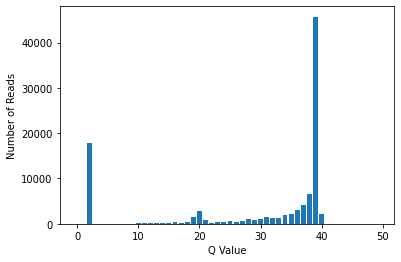

In [70]:
creatHist(human_qua)

In [72]:
def findGCbyPosition(reads):
    gc = [0] * 100
    totals = [0] * 100

    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

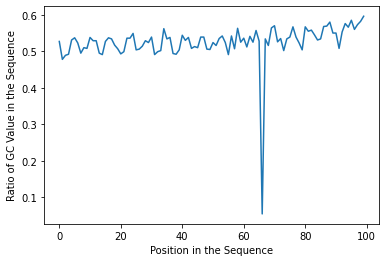

In [73]:
gc_value = findGCbyPosition(human_seq)
plt.plot(range(len(gc_value)),gc_value)
plt.xlabel('Position in the Sequence')
plt.ylabel('Ratio of GC Value in the Sequence')
plt.show()

In [89]:
import numpy as np

def GCOutlierChecker(gc_profile):
    mean = np.mean(gc_profile)
    outliers = []
    for i in range(len(gc_profile)):
        if gc_profile[i] < (mean - 0.1) or gc_profile[i] > (mean + 0.1):
            outliers.append(i)
    
    outlier_boundary = [outliers[0],outliers[len(outliers) - 1]]
    return outliers, outlier_boundary

In [90]:
GCOutlierChecker(gc_value)

([66], [66, 66])

In [94]:
def QscoreChecker(position,qualities):
    Q_values = []
    for q in qualities:
        quality_enc = q[position]
        quality = phred33ToQ(quality_enc)
        Q_values.append(quality)
    return np.mean(Q_values)  

In [95]:
QscoreChecker(66,human_qua)

4.526

In [97]:
Q_list = []
for i in range(len(human_qua[0])):
    Q_list.append(QscoreChecker(i,human_qua))

np.average(Q_list)

29.632679999999997

As the GC value of the sequencing cycle 66 is very low, which is unexpected in human genome (avg GC value of human genome is greater than 0.5), also the Quality Score that particular sequencing cycle is very low so we are not at all very confident about this perticular sequencing cycle (aprox 0.65 or 65% probality of being correct).

#### So, according to the analysis the 66th sequencing cycle is wrong (very poor quality).